In [89]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# 1.Read the column description and ensure you understand each attribute well

In [91]:
personal_loan_df = pd.read_csv('D://AIML STUDY MATERIAL//SupervisedLearning//Project//Bank_Personal_Loan_Modelling-1.csv')

In [92]:
print('The dataSet contains',personal_loan_df.shape[0],' rows  and ',personal_loan_df.shape[1],' columns')

The dataSet contains 5000  rows  and  14  columns


In [93]:
# Print the columns in the dataframe
for idx in personal_loan_df.columns:
        print(' Attribute name - ',idx, ' is of dtypes - ',personal_loan_df.dtypes[idx])

 Attribute name -  ID  is of dtypes -  int64
 Attribute name -  Age  is of dtypes -  int64
 Attribute name -  Experience  is of dtypes -  int64
 Attribute name -  Income  is of dtypes -  int64
 Attribute name -  ZIP Code  is of dtypes -  int64
 Attribute name -  Family  is of dtypes -  int64
 Attribute name -  CCAvg  is of dtypes -  float64
 Attribute name -  Education  is of dtypes -  int64
 Attribute name -  Mortgage  is of dtypes -  int64
 Attribute name -  Personal Loan  is of dtypes -  int64
 Attribute name -  Securities Account  is of dtypes -  int64
 Attribute name -  CD Account  is of dtypes -  int64
 Attribute name -  Online  is of dtypes -  int64
 Attribute name -  CreditCard  is of dtypes -  int64


In [94]:
## Checking for any Negative numbers are there as the dataset contains float and integers.
def hasBadDataPoints(personal_loan_df):
    isBadData = False;
    for idx in personal_loan_df.columns:
        if(personal_loan_df[idx].dtype == 'int64' and 
            personal_loan_df[idx].astype(str).sum().isdigit() == False):
            for i in  range(1,len(personal_loan_df[idx])):
                if(personal_loan_df[idx][i].astype(str).isdigit() == False):
                    isBadData = True
                    print('Column Name',idx,' Row Id: ', i,' has a bad data point as -',personal_loan_df[idx][i])
        if(personal_loan_df[idx].dtype == 'float64'):
            for i in  range(1,len(personal_loan_df[idx])):
                if(personal_loan_df[idx][i].astype(str).replace('.','',1).isdigit() == False):
                    print(' Row Id: ', i,' has a bad data point as -',personal_loan_df[idx][i])
                    isBadData = True
    return isBadData

In [95]:
if(hasBadDataPoints(personal_loan_df)):
        print('Data set has above Bad or Negative Data points.Please correct them')
else:
    print('There are no Bad or negative Data Points')

Column Name Experience  Row Id:  89  has a bad data point as - -1
Column Name Experience  Row Id:  226  has a bad data point as - -1
Column Name Experience  Row Id:  315  has a bad data point as - -2
Column Name Experience  Row Id:  451  has a bad data point as - -2
Column Name Experience  Row Id:  524  has a bad data point as - -1
Column Name Experience  Row Id:  536  has a bad data point as - -1
Column Name Experience  Row Id:  540  has a bad data point as - -1
Column Name Experience  Row Id:  576  has a bad data point as - -1
Column Name Experience  Row Id:  583  has a bad data point as - -1
Column Name Experience  Row Id:  597  has a bad data point as - -2
Column Name Experience  Row Id:  649  has a bad data point as - -1
Column Name Experience  Row Id:  670  has a bad data point as - -1
Column Name Experience  Row Id:  686  has a bad data point as - -1
Column Name Experience  Row Id:  793  has a bad data point as - -2
Column Name Experience  Row Id:  889  has a bad data point as -

In [96]:
# Checking the Dataset is clean or not

if(personal_loan_df.isnull().sum().any()):
    print('The dataset contains null data points')
else:
    print('There are no null data points and the dataset is clean to use')

There are no null data points and the dataset is clean to use


In [97]:
personal_loan_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [98]:
# Function for checking the missed Customer ID from the Datapoints 1 -5000. 
# So Validating any customer ID from 1 -5000 is missed or not

def  hasMissingCustomerId(personal_loan_df_Id):
    missing_rec_Count = 0
    inc =0
    for i in range(1,len(personal_loan_df_Id)):
        if(personal_loan_df['ID'][inc] != i):
            missing_rec_Count= missing_rec_Count+1
            print('The Customer ID -',i,' info is missing')
        else:   
            inc = inc+1
        
    return missing_rec_Count

In [99]:
if(hasMissingCustomerId(personal_loan_df['ID']) == 0):
        print('All the Customer ID from 1 to 5000 are available.There is no missing Customer Id from 1 to 5000')
else:
        print('Please consider the above missing customer Id.')

All the Customer ID from 1 to 5000 are available.There is no missing Customer Id from 1 to 5000


<font color=darkblue>

# Observations:
- Data set has 5000 rows and 14 columns.
- All the columns looks to be numbers with Dtypes integer and float.
- Among the above attributes seeing few Binary columns
    - Personal Loan
    - Securities Account
    - CD Account 	
    - Online
    - CreditCard
- There are few nominal attributes.
    - Customer ID(ID) 
    - Zip Codes
- Categorical or ordinal attributes are as below.
    - Family
    - Education
- Quantitative Numerical attributes are below
    - Age
    - Experience
    - Income
    - CCAvg
    - Mortage
- There are no null data points in the dataset and the dataset is clean to use
- There is no miss in any data for the customer Id from 1 to 5000. So the Thera Bank have provided the customer list     from 1 to 5000
- We can ignore the study of data distributions for attributes ID and ZIP Code as they are type nominal.
- From the above hasBadDataPoints function we have realized that there are few Values for Experience column has negative values and  those negative values should be taken care as the experience won't be in negative.

# 2. Study the data distribution in each attribute, share your findings

In [15]:
# Calculating the data distributions only on the numeric attributes by dropping the Nominal attributes
personl_loan_df_dropped = personal_loan_df.drop(
                         columns=['ID','ZIP Code'])

personl_loan_df_dropped.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [16]:
# Prints the value below which 25% of the data lies

print("Data_quantile(25%):\n",personl_loan_df_dropped.quantile(q=0.25))

Data_quantile(25%):
 Age                   35.0
Experience            10.0
Income                39.0
Family                 1.0
CCAvg                  0.7
Education              1.0
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
Online                 0.0
CreditCard             0.0
Name: 0.25, dtype: float64


<font color=darkblue>

# Observations:
- From the above 1st Quantile below are the observations. 
    - Canditates in 1st Quantile are young working canditates within Age limit of 35.
    - Canditates in 1st Quantile has the Income within 39.0 ($000).
    - Canditates in 1st Quantile are mostly single/Bachelors.
    - Canditates in 1st Quantile are mostly under Graduate.
    - Canditates in 1st Quantile doesn't have any house mortages.
    - Canditates in 1st Quantile has a Average Credit card spending of 0.7(000).
    - Canditates in 1st Quantile mostly doesn't have the Securities account,CD Account,Online,Credit card facilities provide by the bank.
    - Canditates in 1st Qunatile mostly doesn't accept the personal loan in the last campign.
    
     

In [102]:
# Prints the value below which 50% of the data lies

print("Data_quantile(50%):\n",personl_loan_df_dropped.quantile(q=0.50))

Data_quantile(50%):
 Age                   45.0
Experience            20.0
Income                64.0
Family                 2.0
CCAvg                  1.5
Education              2.0
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
Online                 1.0
CreditCard             0.0
Name: 0.5, dtype: float64


<font color=darkblue>

# Observations:
- From the above 2nd Quantile below are the observations. 
    - Canditates in 2nd Quantile are well experienced canditates within Age limit of 45.
    - Canditates in 2nd Quantile has the Income within 64.0 ($000).
    - Canditates in 2nd Quantile are mostly Married.
    - Canditates in 2nd Quantile are mostly Graduate.
    - Canditates in 2nd Quantile doesn't have any house mortages.
    - Canditates in 2nd Quantile has a Average Credit card spending of 1.5(000).
    - Canditates in 2nd Quantile mostly doesn't have the Securities account,CD Account,Credit card facilities provide by the bank.
    - Canditates in the 2nd Quantile mostly opting online banking facilities
    - Canditates in 2nd Qunatile mostly doesn't accept the personal loan in the last campign.

In [103]:
# Prints the value below which 50% of the data lies

print("Data_quantile(75%):\n",personl_loan_df_dropped.quantile(q=0.75))

Data_quantile(75%):
 Age                    55.0
Experience             30.0
Income                 98.0
Family                  3.0
CCAvg                   2.5
Education               3.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
Name: 0.75, dtype: float64


<font color=darkblue>

# Observations:
- From the above 3rd Quantile below are the observations. 
    - Canditates in 3rd Quantile are Masters and expecting a retriement canditates within Age limit of 55.
    - Canditates in 3rd Quantile has the Income within 98.0 ($000).
    - Canditates in 3rd Quantile have a kid/2 kids.
    - Canditates in 3rd Quantile are mostly Advanced in eduacation(Doctrates).
    - Canditates in 3rd Quantile having a mortage values on camparing with canditates in 1st and 2nd Quantile.
    - Canditates in 3rd Quantile has a Average Credit card spending of 2.5(000). 
    - Canditates in the 3rd Qunatile doesn't have the Securities account,CD Account facilities provide by the bank.
    - Canditates in the 3rd Qunatile mostly opted Online banking and Creditcard facilities.
    - Canditates in the 3rd Qunatile mostly doesn't accept the personal loan in the last campign.

<font color=darkblue>

# Observations:
- Common Observations from the above 3 quantiles.
    - Canditates income has a strong linear relationship with age and experience. 
    - Canditates Family Size has a strong linear relationship with age.
    - Canditates Moratge Value has a strong linear relationship with age and experience.
    - Canditates Education has a strong linear relationship with age and experience.
    - Canditates Credit Card Spending has a strong linear relationship with age and Experience.

## Measure of skewness of  ‘Age’

In [104]:

age_mode =personl_loan_df_dropped['Age'].mode()
age_median = personl_loan_df_dropped['Age'].median()
age_mean = personl_loan_df_dropped['Age'].mean()
print('Mode :',age_mode)
print('Median :',age_median)
print('Mean:',age_mean)
print ('Skewness on age :',personl_loan_df_dropped.skew()['Age'])

if(age_mean > age_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    35
dtype: int64
Median : 45.0
Mean: 45.3384
Skewness on age : -0.02934068151284062
Then the distribution is positively skewed.


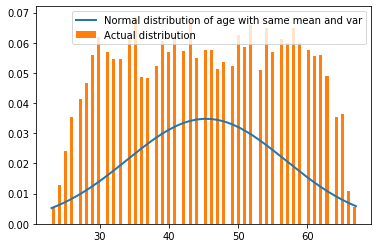

In [915]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(personl_loan_df_dropped['Age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of age with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [106]:
IQR_Age = personl_loan_df_dropped["Age"].quantile(0.75) - personl_loan_df_dropped["Age"].quantile(0.25)

print('IQR_Age -',IQR_Age)

high_Wiskers_outlier = personl_loan_df_dropped["Age"].quantile(0.75) + 1.5*IQR_Age
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = personl_loan_df_dropped["Age"].quantile(0.25)  - 1.5*IQR_Age
print('Lower outliers <',low_Wiskers_outlier)

IQR_Age - 20.0
Higher outliers > 85.0
Lower outliers < 5.0


Text(0.8, 5, 'Lower Outliers')

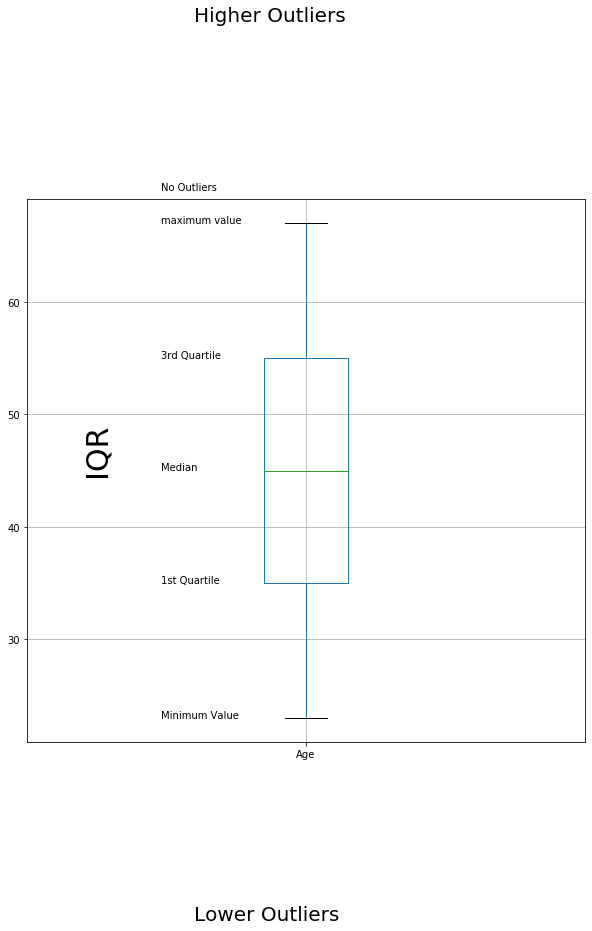

In [917]:
# Box Plot to show the outliers
personl_loan_df_dropped.boxplot(column="Age",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=55, s="3rd Quartile")
plt.text(x=0.74, y=45,  s="Median")
plt.text(x=0.74, y=35,  s="1st Quartile")
plt.text(x=0.74, y=23,  s="Minimum Value")
plt.text(x=0.74, y=67,  s="maximum value")
plt.text(x=0.74, y=70,  s="No Outliers")
plt.text(x=0.80, y=85, s="Higher Outliers",size=20)
plt.text(x=0.60, y=45, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=5, s="Lower Outliers",size=20)

<font color=darkblue>

# Observations:
- Observations on the Distribution of Ages.
    - It's slightly right skewed with the skewness of about -0.02934068151284062
    -  There are no Outliers at Age Attributes, all are within the Higher and Lower Wiskers limit.

## Measure of skewness of  ‘Experience’

In [107]:

experience_mode =personl_loan_df_dropped['Experience'].mode()
experience_median = personl_loan_df_dropped['Experience'].median()
experience_mean = personl_loan_df_dropped['Experience'].mean()
print('Mode :',experience_mode)
print('Median :',experience_median)
print('Mean:',experience_mean)
print ('Skewness on Experience :',personl_loan_df_dropped.skew()['Experience'])

if(experience_mean > experience_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')


Mode : 0    32
dtype: int64
Median : 20.0
Mean: 20.1046
Skewness on Experience : -0.026324688402384225
Then the distribution is positively skewed.


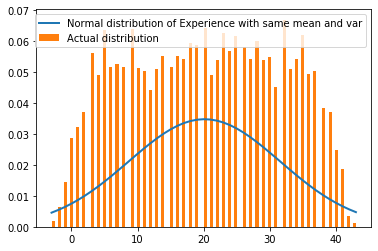

In [108]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(personl_loan_df_dropped['Experience'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of Experience with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [109]:
IQR_Experience = personl_loan_df_dropped["Experience"].quantile(0.75) - personl_loan_df_dropped["Experience"].quantile(0.25)

print('IQR_Experience -',IQR_Experience)

high_Wiskers_outlier = personl_loan_df_dropped["Experience"].quantile(0.75) + 1.5*IQR_Experience
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = personl_loan_df_dropped["Experience"].quantile(0.25)  - 1.5*IQR_Experience
print('Lower outliers <',low_Wiskers_outlier)

IQR_Experience - 20.0
Higher outliers > 60.0
Lower outliers < -20.0


Text(0.74, -20, 'Lower Outlier')

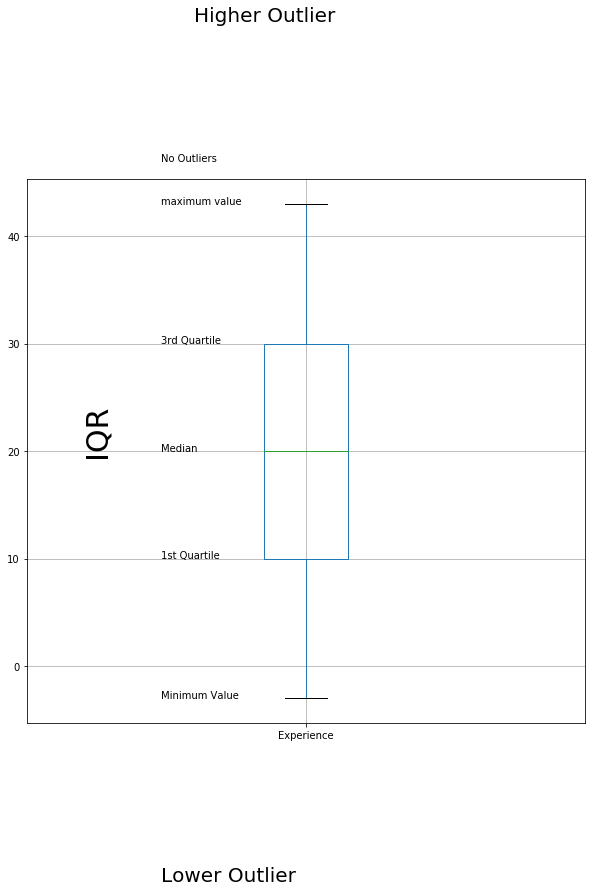

In [110]:
# Box Plot to show the outliers
personl_loan_df_dropped.boxplot(column="Experience",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=30, s="3rd Quartile")
plt.text(x=0.74, y=20,  s="Median")
plt.text(x=0.74, y=10,  s="1st Quartile")
plt.text(x=0.74, y=-3,  s="Minimum Value")
plt.text(x=0.74, y=43,  s="maximum value")
plt.text(x=0.74, y=47,  s="No Outliers")
plt.text(x=0.80, y=60, s="Higher Outlier", size=20)
plt.text(x=0.60, y=20, s="IQR", rotation=90, size=30)
plt.text(x=0.74, y=-20, s="Lower Outlier", size=20)

<font color=darkblue>

# Observations:
- Observations on the Distribution of Experience.
    - It's slightly right skewed with the skewness of about -0.026324688402384225
    - There are no values above Higher Wiskers value and the value below lower wiskers limit.

## Measure of skewness of  ‘Income’

In [111]:

income_mode =personl_loan_df_dropped['Income'].mode()
income_median = personl_loan_df_dropped['Income'].median()
income_mean = personl_loan_df_dropped['Income'].mean()
print('Mode :',experience_mode)
print('Median :',experience_median)
print('Mean:',experience_mean)
print ('Skewness on Income :',personl_loan_df_dropped.skew()['Income'])

if(income_mean > income_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    32
dtype: int64
Median : 20.0
Mean: 20.1046
Skewness on Income : 0.8413386072610921
Then the distribution is positively skewed.


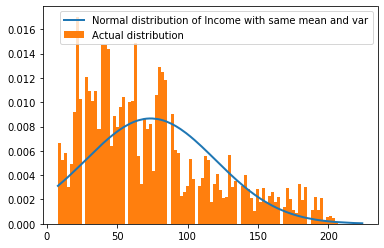

In [112]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(personl_loan_df_dropped['Income'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of Income with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [113]:
IQR_Income = personl_loan_df_dropped["Income"].quantile(0.75) - personl_loan_df_dropped["Income"].quantile(0.25)

print('IQR_Income -',IQR_Income)

high_Wiskers_outlier = personl_loan_df_dropped["Income"].quantile(0.75) + 1.5*IQR_Income
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = personl_loan_df_dropped["Income"].quantile(0.25)  - 1.5*IQR_Income
print('Lower outliers <',low_Wiskers_outlier)

IQR_Income - 59.0
Higher outliers > 186.5
Lower outliers < -49.5


Text(0.8, -49.5, 'Lower Outlier')

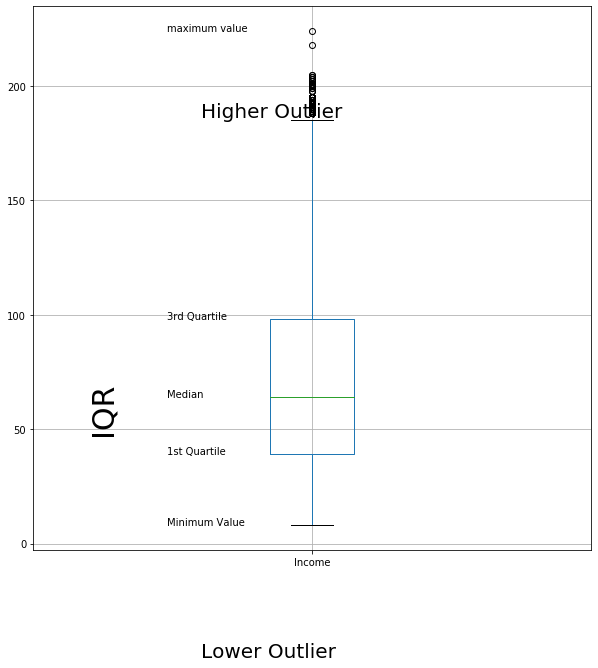

In [114]:
# Box Plot to show the outliers
personl_loan_df_dropped.boxplot(column="Income",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=98, s="3rd Quartile")
plt.text(x=0.74, y=64,  s="Median")
plt.text(x=0.74, y=39,  s="1st Quartile")
plt.text(x=0.74, y=8,  s="Minimum Value")
plt.text(x=0.74, y=224,  s="maximum value")
plt.text(x=0.80, y=186.5, s="Higher Outlier", size=20)
plt.text(x=0.60, y=50, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=-49.5, s="Lower Outlier", size=20)

<font color=darkblue>

# Observations:
- Observations on the Distribution of Income.
    - It's right skewed with the skewness of about 0.8413386072610921
    - We are seeing lot of values above the High Wiskers limit.

# Distribution of Data on Family           

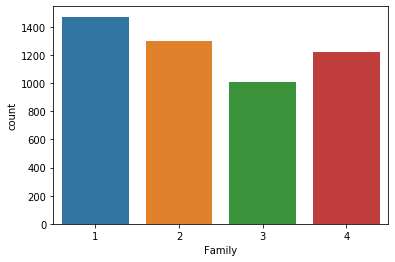

In [822]:
sns.countplot(x="Family", data=personl_loan_df_dropped)

<font color=darkblue>

# Observations:
- Observations on the Distribution of Family.
    - Since its a Categorical Data, the above countplot shows
        - Most canditate's are single.
        - Second maximum canditates are couples.
        - Third Maximum canditates are married and having 2 kids.
        - Minimal Canditates are couple with single kid.

 # Measure of Skewness of CCAvg                 

In [115]:
CCAvg_mode =personl_loan_df_dropped['CCAvg'].mode()
CCAvg_median = personl_loan_df_dropped['CCAvg'].median()
CCAvg_mean = personl_loan_df_dropped['CCAvg'].mean()
print('Mode :',CCAvg_mode)
print('Median :',CCAvg_median)
print('Mean:',CCAvg_mean)
print ('Skewness on CCAvg :',personl_loan_df_dropped.skew()['CCAvg'])

if(CCAvg_mean > CCAvg_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    0.3
dtype: float64
Median : 1.5
Mean: 1.9379380000000053
Skewness on CCAvg : 1.5984433366678532
Then the distribution is positively skewed.


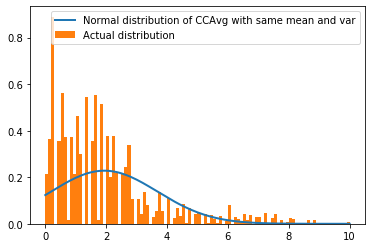

In [116]:
 #convert pandas DataFrame object to numpy array and sort
h = np.asarray(personl_loan_df_dropped['CCAvg'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of CCAvg with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [829]:
IQR_CCAvg = personl_loan_df_dropped["CCAvg"].quantile(0.75) - personl_loan_df_dropped["CCAvg"].quantile(0.25)

print('IQR_CCAvg -',IQR_CCAvg)

high_Wiskers_outlier = personl_loan_df_dropped["CCAvg"].quantile(0.75) + 1.5*IQR_CCAvg
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = personl_loan_df_dropped["CCAvg"].quantile(0.25)  - 1.5*IQR_CCAvg
print('Lower outliers <',low_Wiskers_outlier)

IQR_CCAvg - 1.8
Higher outliers > 5.2
Lower outliers < -2.0


Text(1.2, -2.0, 'Lower Outlier')

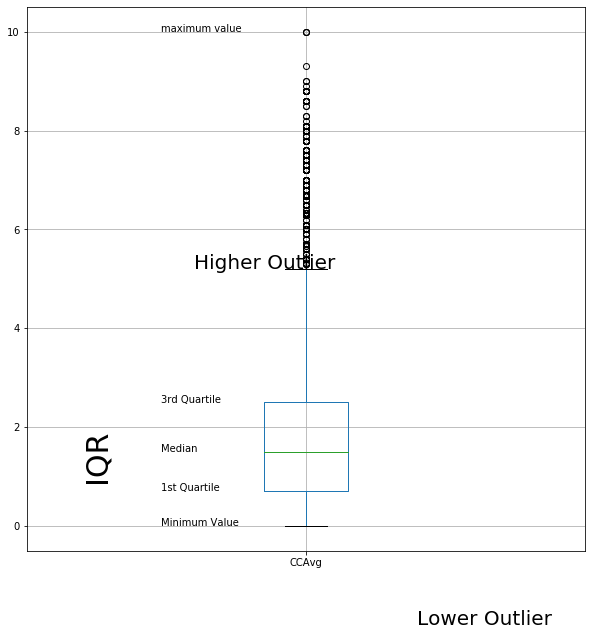

In [830]:
# Box Plot to show the outliers
personl_loan_df_dropped.boxplot(column="CCAvg",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=2.5, s="3rd Quartile")
plt.text(x=0.74, y=1.5,  s="Median")
plt.text(x=0.74, y=0.7,  s="1st Quartile")
plt.text(x=0.74, y=0,  s="Minimum Value")
plt.text(x=0.74, y=10,  s="maximum value")
plt.text(x=0.80, y=5.2, s="Higher Outlier", size=20)
plt.text(x=0.60, y=1.0, s="IQR", rotation=90, size=30)
plt.text(x=1.20, y=-2.0, s="Lower Outlier", size=20)

<font color=darkblue>

# Observations:
- Observations on the Distribution of CCAvg.
    - It's  right skewed with the skewness of about 1.5984433366678532
    - There are lot of values above the Higher Outliers.

# Distribution of Data on Education

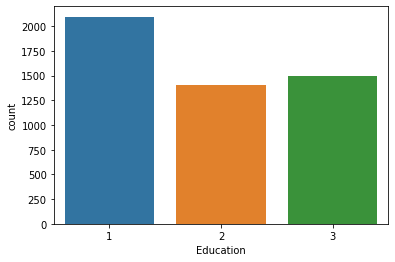

In [227]:
sns.countplot(x="Education", data=personl_loan_df_dropped)

<font color=darkblue>

# Observations:
- Observations on the Distribution of Education.
    - Since its a Categorical Data, the above countplot shows
        - Most canditate's are UnderGraduates.
        - Second maximum canditates are Advanced/Professionals.
        - Minimal Canditates are Graduates.

# Measure of Skewness on Mortgage

In [117]:
Mortgage_mode =personl_loan_df_dropped['Mortgage'].mode()
Mortgage_median = personl_loan_df_dropped['Mortgage'].median()
Mortgage_mean = personl_loan_df_dropped['Mortgage'].mean()
print('Mode :',Mortgage_mode)
print('Median :',Mortgage_median)
print('Mean:',Mortgage_mean)
print ('Skewness on Mortgage :',personl_loan_df_dropped.skew()['Mortgage'])

if(Mortgage_mean > Mortgage_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    0
dtype: int64
Median : 0.0
Mean: 56.4988
Skewness on Mortgage : 2.1040023191080377
Then the distribution is positively skewed.


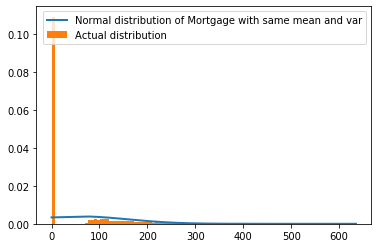

In [118]:
 #convert pandas DataFrame object to numpy array and sort
h = np.asarray(personl_loan_df_dropped['Mortgage'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of Mortgage with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [212]:
IQR_Mortgage = personl_loan_df_dropped["Mortgage"].quantile(0.75) - personl_loan_df_dropped["Mortgage"].quantile(0.25)

print('IQR_Mortgage -',IQR_Mortgage)

high_Wiskers_outlier = personl_loan_df_dropped["Mortgage"].quantile(0.75) + 1.5*IQR_Mortgage
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = personl_loan_df_dropped["Mortgage"].quantile(0.25)  - 1.5*IQR_Mortgage
print('Lower outliers <',low_Wiskers_outlier)

IQR_Mortgage - 101.0
Higher outliers > 252.5
Lower outliers < -151.5


<font color=darkblue>

# Observations:
- Observations on the Distribution of Mortgage.
    - It's  right skewed with the skewness of about 2.1040023191080377
    -  Few data points are above the Higher Outliers

# Distribution of Data on Personal Loan

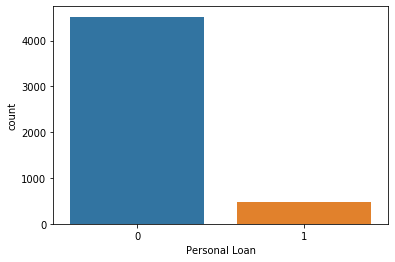

In [157]:
sns.countplot(x="Personal Loan", data=personl_loan_df_dropped)

<font color=darkblue>

# Observations:
- Observations on the Distributions on Personal Loan.
    - Since it's a Binary Attribute, the above countplot shows
        - Most canditate's didn't purchase Personal Loan on the previous campign.
        - ~ 480 customers have purchased personal loans on the last campign.

# Distribution of Data on Securities Account

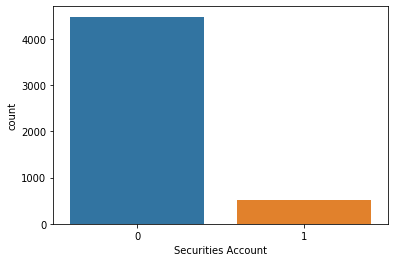

In [204]:
sns.countplot(x="Securities Account", data=personl_loan_df_dropped)

<font color=darkblue>

# Observations:
- Observations on the Distributions on Securities Account.
    - Since it's a Binary Attribute, the above countplot shows
        - Most of the customer didn't opt for Securities account option provided by the bank.

# Distribution of Data on CD Account

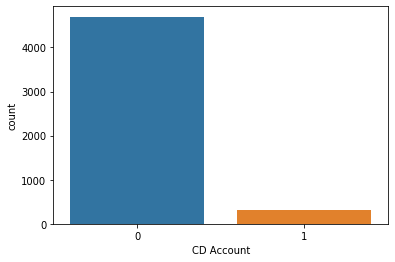

In [161]:
sns.countplot(x="CD Account", data=personl_loan_df_dropped)

<font color=darkblue>

# Observations:
- Observations on the Distributions on CD Account.
    - Since it's a Binary Attribute, the above countplot shows
        - Most of the customer didn't opt for CD account option provided by the bank.

# Distribution of Data on Online Attribute

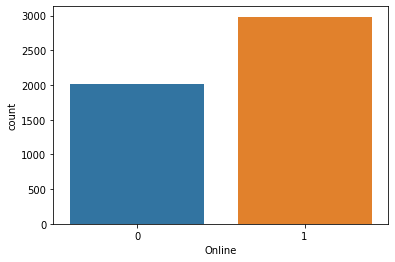

In [164]:
sns.countplot(x="Online", data=personl_loan_df_dropped)

<font color=darkblue>

# Observations:
- Observations on the Distributions on Online.
    - Since it's a Binary Attribute, the above countplot shows
        - Nearly 3000 customers have opted for online options

# Distribution of Data on CreditCard

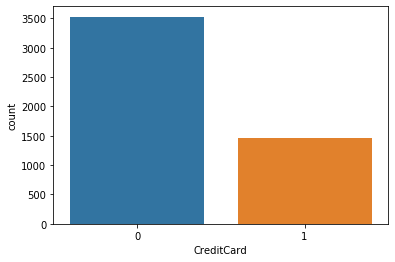

In [166]:
sns.countplot(x="CreditCard", data=personl_loan_df_dropped)

<font color=darkblue>

# Observations:
- Observations on the Distributions on CreditCard.
    - Since it's a Binary Attribute, the above countplot shows
        - Nearly 3500 customers have opted for credit Card options

# 3. Get the target column distribution. Your comments

In [128]:
# Replace the numbers in categorical variables Eduaction as UnderGraduate,Graduate,Professional
# Replacing Famil size 1,2,3 and 4 as Single,Married,Married_With_Kid, Married_With_2_Kid
personl_loan_df_dropped['Education'] = personl_loan_df_dropped['Education'].replace({1: 'Under_Graduate', 2: 'Graduate', 3: 'Advance_Professional'})

personl_loan_df_dropped['Family'] = personl_loan_df_dropped['Family'].replace({1: 'Single', 2: 'Married', 3: 'Married_With_Kid', 4: 'Married_With_2_Kid'})

In [129]:
personl_loan_df_dropped.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,Married_With_2_Kid,1.6,Under_Graduate,0,0,1,0,0,0
1,45,19,34,Married_With_Kid,1.5,Under_Graduate,0,0,1,0,0,0
2,39,15,11,Single,1.0,Under_Graduate,0,0,0,0,0,0
3,35,9,100,Single,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,Married_With_2_Kid,1.0,Graduate,0,0,0,0,0,1


In [130]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also Known as one hot coding. The column names will be Education_1 as Under Graduate, 
# Education_2 as Graduate and Education_3 as Professional/Advanced.
# Family_1 as Single, Family_2 as Couple, Family_3 as Couple with a kid, Family_4 as Couple with 2 kids
personal_loan_df_convert = pd.get_dummies(personl_loan_df_dropped, columns=['Education','Family'])

In [131]:
personal_loan_df_convert.head(5)

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advance_Professional,Education_Graduate,Education_Under_Graduate,Family_Married,Family_Married_With_2_Kid,Family_Married_With_Kid,Family_Single
0,25,1,49,1.6,0,0,1,0,0,0,0,0,1,0,1,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,0,1,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,35,9,100,2.7,0,0,0,0,0,0,0,1,0,0,0,0,1
4,35,8,45,1.0,0,0,0,0,0,1,0,1,0,0,1,0,0


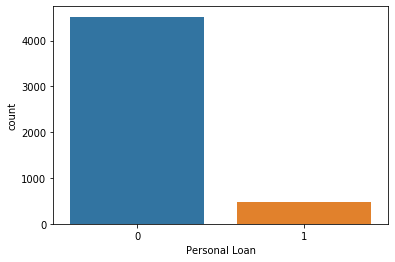

In [132]:
sns.countplot(x="Personal Loan", data=personal_loan_df_convert)

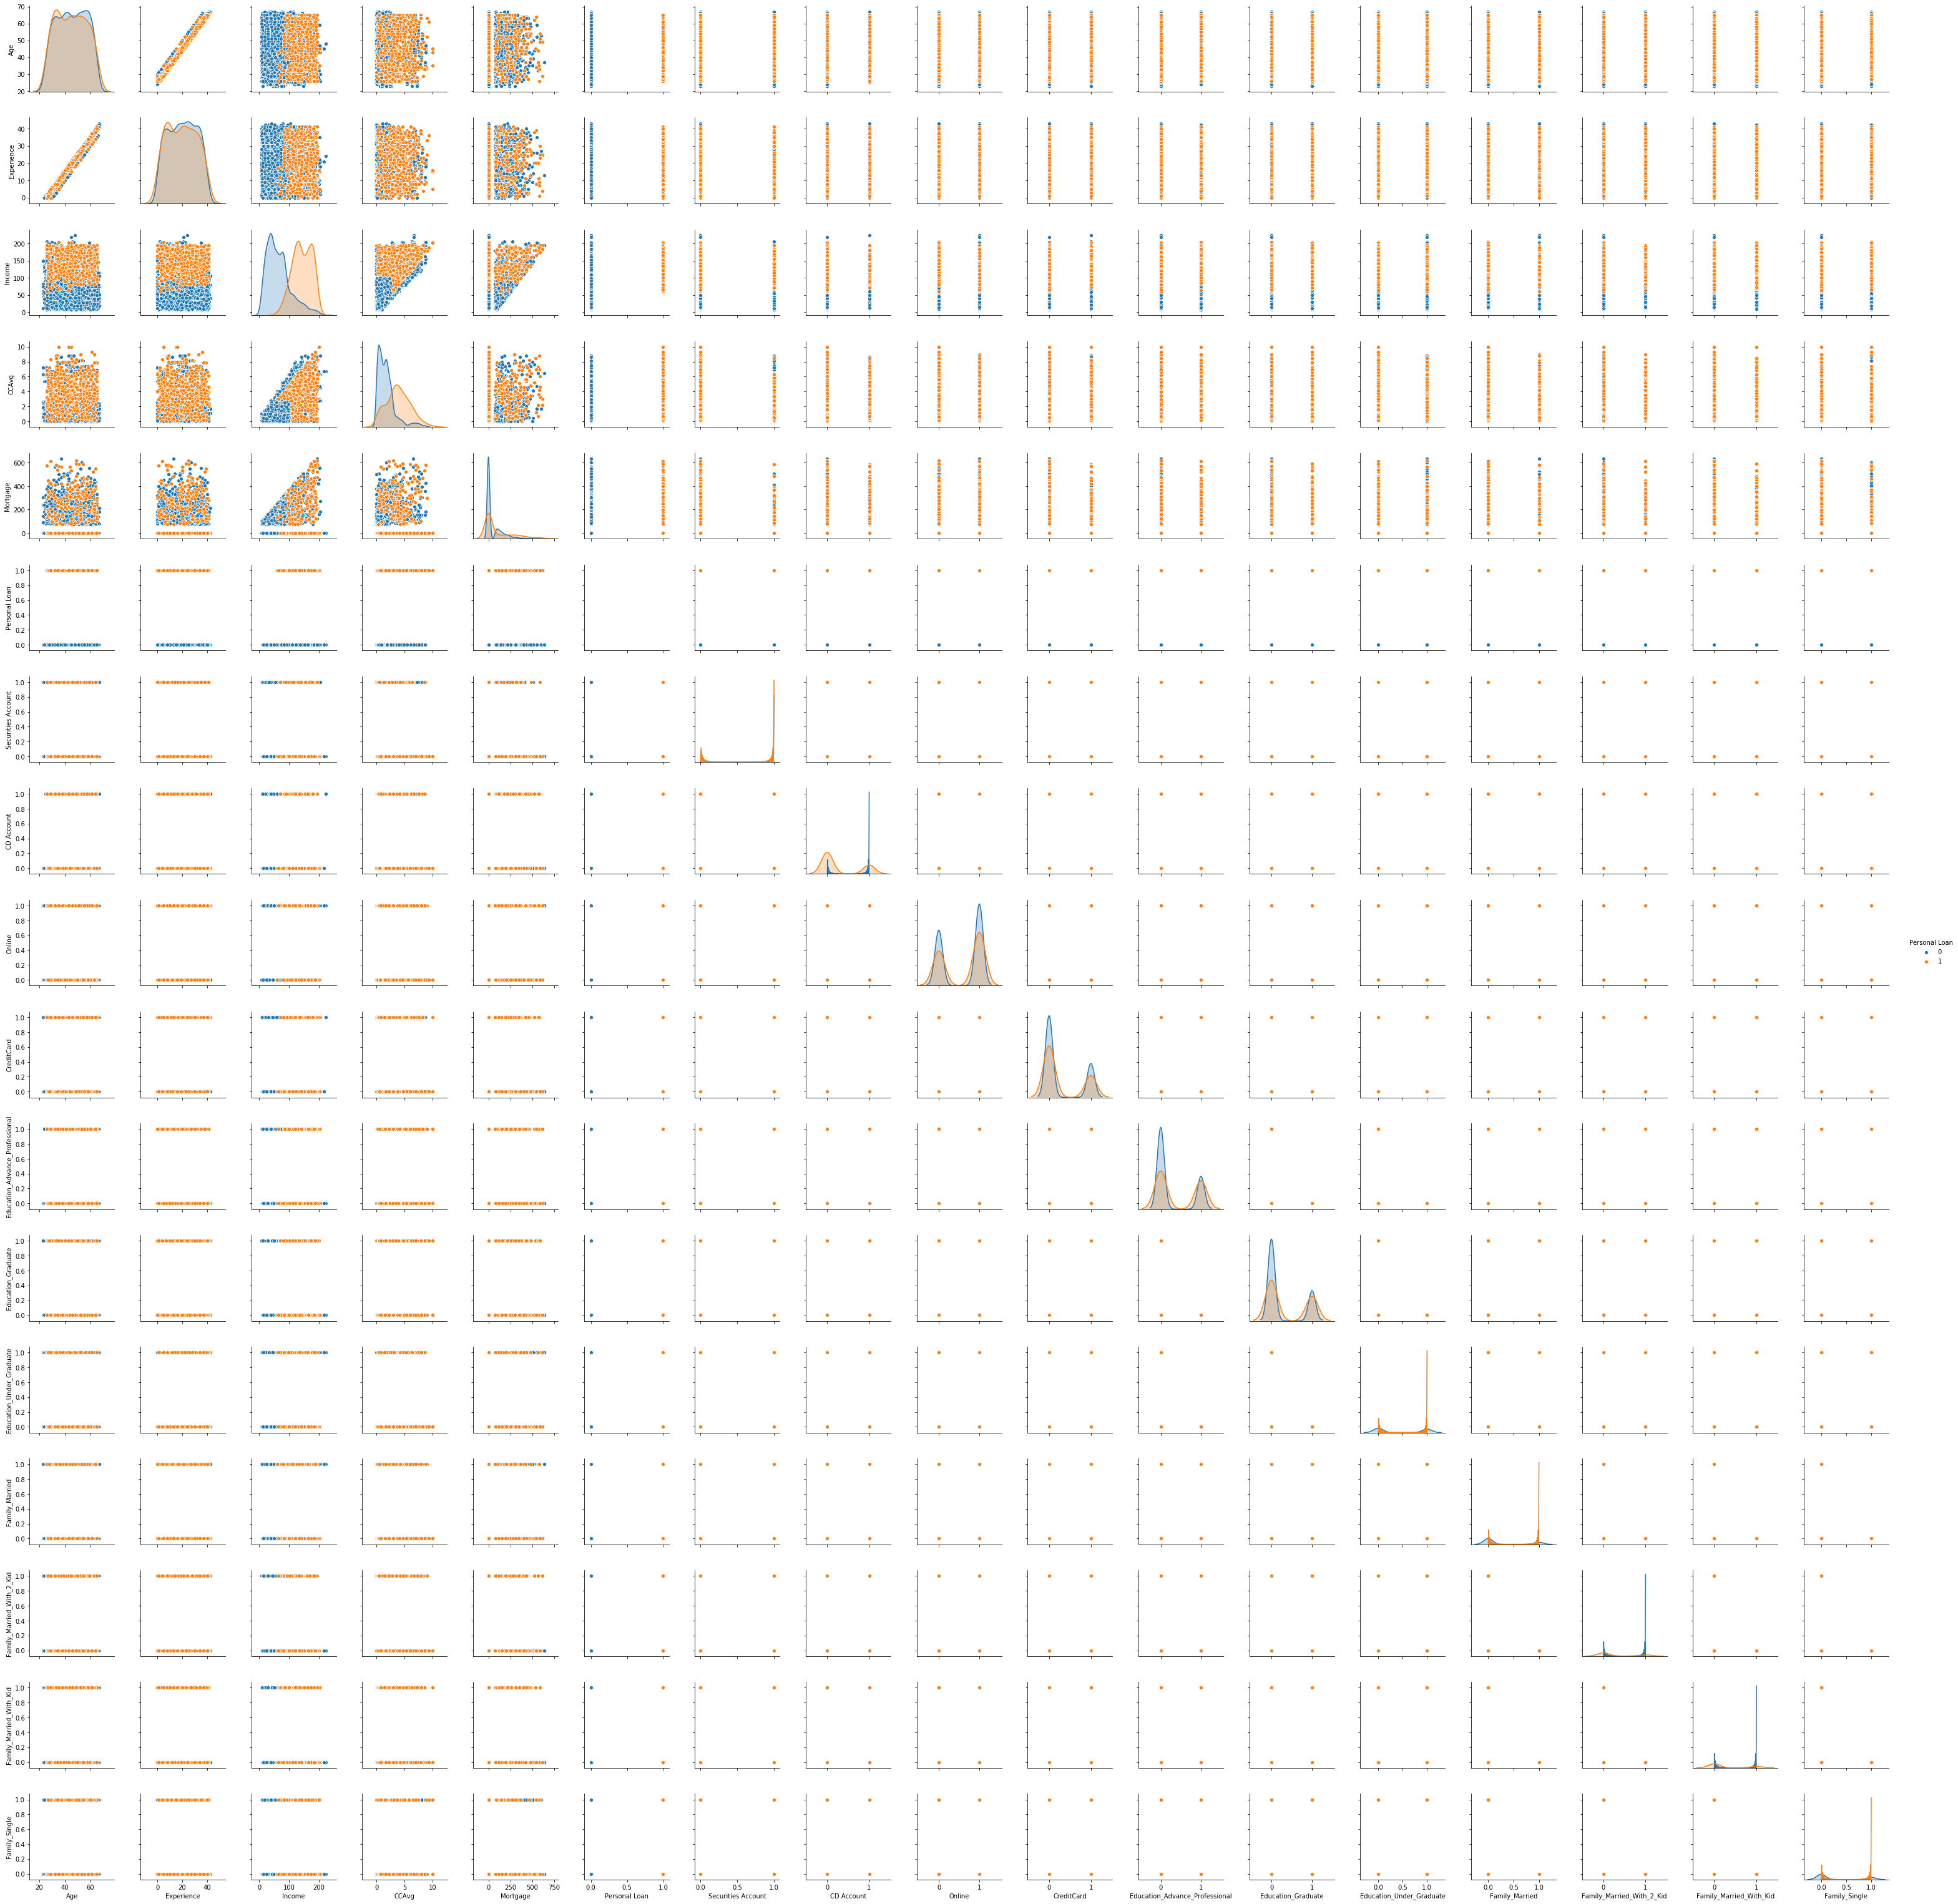

In [219]:
sns.pairplot(personal_loan_df_convert,diag_kind='kde',hue='Personal Loan')

<font color=darkblue>

# Observations:
- Observations on the Distributions on Personal Loan.
    - Since it's a Binary Attribute, the above countplot shows
        - Most canditate's didn't purchase Personal Loan on the previous campign.
        - ~ 480 customers have purchased personal loans on the last campign.
        - Distribution of customers opted for personal loan and not opted for personal loan has a same distributions across Attributes Age,Experience and Mortage
        - customers opted for personal loan and not opted for personal loan has a varying distributions for Income and CCAvg Spending. So the Income and CCAvg has a good effect in personal loan target Column.


# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [133]:
# Separating Target and Features

# Copy all the predictor variables into X dataframe. Since 'Personal Loan' is dependent variable drop it
X = personal_loan_df_convert.drop('Personal Loan', axis=1)

# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
y = personal_loan_df_convert[['Personal Loan']]

In [134]:
# Shuffle and split the dataset into the number of training and testing points above

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3500 samples.
Testing set has 1500 samples.


In [135]:
# preparing the data for training and Test set by imputing the negative values in the Experience Attribute
# Purposly Making the negative values in Experience Attributes as NAN
personal_loan_df_convert = personal_loan_df_convert.assign(Experience = lambda x : x.Experience.where(x.Experience.ge(0)))
personal_loan_df_convert.shape

(5000, 17)

In [136]:
#Imputing the Negative Values Using IterativeImputer by using Multi Variate Feature Imputation
#as the Mean/Median for Experience Attribute is 20 but the Age for those Negative values 
#in Experience are from 25 - 29, 
#which found to be logically wrong. I have set the Minimum Experience value as 1 and not as 0, because I am seeing the 
#Income is greater than 0 which means a canditate should be working.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0,min_value =1)
imp.fit(personal_loan_df_convert)
IterativeImputer(random_state=0)
personal_loan_df_imputed = pd.DataFrame(data = imp.transform(personal_loan_df_convert),
                                        columns =personal_loan_df_convert.columns)
personal_loan_df_imputed = personal_loan_df_imputed.round({'Experience':0})

In [142]:
# Separating Target and Features

# Copy all the predictor variables into X_Imputed dataframe. Since 'Personal Loan' is dependent variable drop it
X_Imputed = personal_loan_df_imputed.drop('Personal Loan', axis=1)

# Copy the 'Personal Loan' column alone into the y_Imputed dataframe. This is the dependent variable
y_Imputed = personal_loan_df_imputed[['Personal Loan']]

In [143]:
# Shuffle and split the dataset into the number of training and testing points above

X_train_Imputed,X_test_Imputed,y_train_Imputed,y_test_Imputed = train_test_split(X_Imputed,y_Imputed,
                                                                                 test_size=0.30, random_state=1)

# Show the results of the split
print("Training set has {} samples after Imputation.".format(X_train_Imputed.shape[0]))
print("Testing set has {} samples after Imputation.".format(X_test_Imputed.shape[0]))

Training set has 3500 samples after Imputation.
Testing set has 1500 samples after Imputation.


# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

Logistic Regression before imputing the negative values in the Experience Attributes

In [144]:
lr=LogisticRegression()

pt = PowerTransformer()
pt.fit(X_train)
ptX_train = pt.transform(X_train)
ptX_test = pt.transform(X_test)

lr.fit(X_train,y_train)
predicted_test = lr.predict(X_test)
predicted_train = lr.predict(X_train)


print("Testing Accuracy before imputation for Logistic Regression  is")
print(lr.score(X_test,y_test))
print("Training Accuracy before imputation for Logistic Regression is")
print(lr.score(X_train,y_train))

Testing Accuracy before imputation for Logistic Regression  is
0.9546666666666667
Training Accuracy before imputation for Logistic Regression is
0.962


In [145]:
lr_sc=LogisticRegression()
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
lr_sc.fit(scaledX_train,y_train)

print("What is the Scaled Testing Accuracy before imputation?")
print(lr_sc.score(scaledX_test,y_test))
print("What is the Scaled Training Accuracy before imputation?")
print(lr_sc.score(scaledX_train,y_train))

What is the Scaled Testing Accuracy before imputation?
0.9553333333333334
What is the Scaled Training Accuracy before imputation?
0.9611428571428572


<b> As we are seeing few outliers on income, CCAVG and Mortage Attributes, 
We are using the powertransformers to transform and fit the model, where we are trying to get high accuracy</b>

In [146]:
lr_Pt=LogisticRegression()

pt = PowerTransformer()
pt.fit(X_train)
ptX_train = pt.transform(X_train)
ptX_test = pt.transform(X_test)

lr_Pt.fit(ptX_train,y_train)
predicted_pt_test = lr_Pt.predict(ptX_test)
predicted_pt_train = lr_Pt.predict(ptX_train)

print("Testing Accuracy after power transformed and before imputation for Logistic Regression  is")
print(lr_Pt.score(ptX_test,y_test))
print("Training Accuracy after power transformed and before imputation for Logistic Regression is")
print(lr_Pt.score(ptX_train,y_train))

Testing Accuracy after power transformed and before imputation for Logistic Regression  is
0.962
Training Accuracy after power transformed and before imputation for Logistic Regression is
0.9662857142857143


Logistic Regression after imputing the negative values in the Experience Attributes

In [147]:
lr_Imputed=LogisticRegression()
lr_Imputed.fit( X_train_Imputed,y_train_Imputed)
predicted_test_imputed = lr_Imputed.predict(X_test_Imputed)
predicted_train_imputed = lr_Imputed.predict(X_train_Imputed)

print("Testing Accuracy after imputation for Logistic Regression  is")
print(lr_Imputed.score(X_test_Imputed,y_test_Imputed))
print("Training Accuracy after imputation for Logistic Regression is")
print(lr_Imputed.score(X_train_Imputed,y_train_Imputed))

Testing Accuracy after imputation for Logistic Regression  is
0.9546666666666667
Training Accuracy after imputation for Logistic Regression is
0.962


In [148]:
lr_sc_imputed = LogisticRegression()
sc_Imputed=StandardScaler()
sc_Imputed.fit(X_train_Imputed)
scaledX_Imputed_train = sc_Imputed.transform(X_train_Imputed)
scaledX_Imputed_test = sc_Imputed.transform(X_test_Imputed)
lr_sc_imputed.fit(scaledX_Imputed_train,y_train_Imputed)
print("What is the Scaled Testing Accuracy  after Imputation?")
print(lr_sc_imputed.score(scaledX_Imputed_test,y_test_Imputed))
print("What is the Scaled Training Accuracy  after Imputation?")
print(lr_sc_imputed.score(scaledX_Imputed_train,y_train_Imputed))

What is the Scaled Testing Accuracy  after Imputation?
0.9553333333333334
What is the Scaled Training Accuracy  after Imputation?
0.9617142857142857


In [149]:
lr_Pt_Imputed=LogisticRegression()

pt_imputed = PowerTransformer()
pt_imputed.fit(X_train_Imputed)
pt_imputedX_train = pt_imputed.transform(X_train_Imputed)
pt_imputedX_test = pt_imputed.transform(X_test_Imputed)

lr_Pt_Imputed.fit(pt_imputedX_train,y_train)
predicted_pt_Imputed_test = lr_Pt_Imputed.predict(pt_imputedX_test)
predicted_pt_Imputed_train = lr_Pt_Imputed.predict(pt_imputedX_train)

print("Testing Accuracy after power transformed and after imputed for Logistic Regression  is")
print(lr_Pt_Imputed.score(pt_imputedX_test,y_test_Imputed))
print("Training Accuracy after power transformed and after imputed  for Logistic Regression is")
print(lr_Pt_Imputed.score(pt_imputedX_train,y_train_Imputed))

Testing Accuracy after power transformed and after imputed for Logistic Regression  is
0.962
Training Accuracy after power transformed and after imputed  for Logistic Regression is
0.9662857142857143


<font color=darkblue>

# Observations:
- From the above observations on the Logistic Regression Model
    - Imputation on the negative Values of Experience Attribute doesn't have impact much on the Model's Accuracy.
    - Scaling/transformation doesn't have much impact on the Model's Accuracy
    - The model predicts the likelihood of the liability customer buying personal loan has an accuracy on 96% for the training set and 95% for the testing Set.
    - Overall this model looks to be a good/fit model as the accuracy of training and Testing set is above 95% and the accuracy of training is greater than Testing
    -  Due to outliers on Income,CCAvg and Mortage, the power transformed dataset has accuracy looks to be more as high as 96%

 K-neighbours Classifier Without imputing the negative values in the Experience Attributes

In [150]:
for i in range(3, 50,2):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    NNH.fit(X_train, y_train)
    predicted_KNN_test = NNH.predict(X_test)
    predicted_KNN_train = NNH.predict(X_train)
    print("Testing Accuracy before imputation KNN with the n_neighbors=", i," is")
    print(NNH.score(X_test,y_test))
    print("Training Accuracy before imputation KNN with the n_neighbors=", i ," is")
    print(NNH.score(X_train,y_train)) 
    print("\n")

Testing Accuracy before imputation KNN with the n_neighbors= 3  is
0.8993333333333333
Training Accuracy before imputation KNN with the n_neighbors= 3  is
0.9505714285714286


Testing Accuracy before imputation KNN with the n_neighbors= 5  is
0.9006666666666666
Training Accuracy before imputation KNN with the n_neighbors= 5  is
0.9328571428571428


Testing Accuracy before imputation KNN with the n_neighbors= 7  is
0.9033333333333333
Training Accuracy before imputation KNN with the n_neighbors= 7  is
0.926


Testing Accuracy before imputation KNN with the n_neighbors= 9  is
0.908
Training Accuracy before imputation KNN with the n_neighbors= 9  is
0.9254285714285714


Testing Accuracy before imputation KNN with the n_neighbors= 11  is
0.9046666666666666
Training Accuracy before imputation KNN with the n_neighbors= 11  is
0.922


Testing Accuracy before imputation KNN with the n_neighbors= 13  is
0.9046666666666666
Training Accuracy before imputation KNN with the n_neighbors= 13  is
0.9208

In [151]:
for i in range(3, 50,2):
    NNH_sc = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    KNN_Sc = StandardScaler()
    KNN_Sc.fit(X_train)
    scaledX_KNN_train = KNN_Sc.transform(X_train)
    scaledX_KNN_test = KNN_Sc.transform(X_test)
    NNH_sc.fit(scaledX_KNN_train,y_train)
    print("What is the Scaled Testing Accuracy before imputation  for KNN with the n_neighbors=", i," is")
    print(NNH_sc.score(scaledX_KNN_test,y_test))
    print("What is the Scaled Training Accuracy before imputation for KNN with the n_neighbors=", i," is")
    print(NNH_sc.score(scaledX_KNN_train,y_train))
    print("\n")

What is the Scaled Testing Accuracy before imputation  for KNN with the n_neighbors= 3  is
0.9546666666666667
What is the Scaled Training Accuracy before imputation for KNN with the n_neighbors= 3  is
0.9768571428571429


What is the Scaled Testing Accuracy before imputation  for KNN with the n_neighbors= 5  is
0.948
What is the Scaled Training Accuracy before imputation for KNN with the n_neighbors= 5  is
0.9688571428571429


What is the Scaled Testing Accuracy before imputation  for KNN with the n_neighbors= 7  is
0.944
What is the Scaled Training Accuracy before imputation for KNN with the n_neighbors= 7  is
0.9605714285714285


What is the Scaled Testing Accuracy before imputation  for KNN with the n_neighbors= 9  is
0.942
What is the Scaled Training Accuracy before imputation for KNN with the n_neighbors= 9  is
0.9557142857142857


What is the Scaled Testing Accuracy before imputation  for KNN with the n_neighbors= 11  is
0.9393333333333334
What is the Scaled Training Accuracy bef

In [174]:
for i in range(3, 50,2):
    NNH_Pt_sc = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    KNN_pt = PowerTransformer()
    KNN_pt.fit(X_train)
    KNN_ptX_train = KNN_pt.transform(X_train)
    KNN_ptX_test = KNN_pt.transform(X_test)
    NNH_Pt_sc.fit(KNN_ptX_train,y_train)
    predicted_KNN_pt_test = NNH_Pt_sc.predict(KNN_ptX_test)
    predicted_KNN_pt_train = NNH_Pt_sc.predict(KNN_ptX_train)
    print("Testing Accuracy after Power transformed and before imputation  for KNN with the n_neighbors=", i," is")
    print(NNH_Pt_sc.score(KNN_ptX_test,y_test))
    print("Training Accuracy after Power transformed and before imputation for KNN with the n_neighbors=", i," is")
    print(NNH_Pt_sc.score(KNN_ptX_train,y_train))
    print("\n")

Testing Accuracy after Power transformed and before imputation  for KNN with the n_neighbors= 3  is
0.9466666666666667
Training Accuracy after Power transformed and before imputation for KNN with the n_neighbors= 3  is
0.9717142857142858


Testing Accuracy after Power transformed and before imputation  for KNN with the n_neighbors= 5  is
0.9373333333333334
Training Accuracy after Power transformed and before imputation for KNN with the n_neighbors= 5  is
0.9594285714285714


Testing Accuracy after Power transformed and before imputation  for KNN with the n_neighbors= 7  is
0.94
Training Accuracy after Power transformed and before imputation for KNN with the n_neighbors= 7  is
0.9531428571428572


Testing Accuracy after Power transformed and before imputation  for KNN with the n_neighbors= 9  is
0.9373333333333334
Training Accuracy after Power transformed and before imputation for KNN with the n_neighbors= 9  is
0.9505714285714286


Testing Accuracy after Power transformed and before im

 K-neighbours Classifier after imputing the negative values in the Experience Attributes

In [167]:
for i in range(3, 50,2):
    NNH_Imputed = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    NNH_Imputed.fit(X_train_Imputed, y_train_Imputed)
    predicted_KNN_test_Imputed = NNH_Imputed.predict(X_test_Imputed)
    predicted_KNN_train_Imputed = NNH_Imputed.predict(X_train_Imputed)
    print("Testing Accuracy after imputation for KNN with the n_neighbors=", i," is")
    print(NNH_Imputed.score(X_test_Imputed,y_test_Imputed))
    print("Training Accuracy after imputation for KNN with the n_neighbors=", i," is")
    print(NNH_Imputed.score(X_train_Imputed,y_train_Imputed))
    print("\n")

Testing Accuracy after imputation for KNN with the n_neighbors= 3  is
0.9
Training Accuracy after imputation for KNN with the n_neighbors= 3  is
0.9508571428571428


Testing Accuracy after imputation for KNN with the n_neighbors= 5  is
0.9006666666666666
Training Accuracy after imputation for KNN with the n_neighbors= 5  is
0.9325714285714286


Testing Accuracy after imputation for KNN with the n_neighbors= 7  is
0.9033333333333333
Training Accuracy after imputation for KNN with the n_neighbors= 7  is
0.926


Testing Accuracy after imputation for KNN with the n_neighbors= 9  is
0.908
Training Accuracy after imputation for KNN with the n_neighbors= 9  is
0.9254285714285714


Testing Accuracy after imputation for KNN with the n_neighbors= 11  is
0.9046666666666666
Training Accuracy after imputation for KNN with the n_neighbors= 11  is
0.922


Testing Accuracy after imputation for KNN with the n_neighbors= 13  is
0.9046666666666666
Training Accuracy after imputation for KNN with the n_nei

In [168]:
for i in range(3, 50,2):
    NNH_Imputed_sc = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    KNN_Imputed_Sc = StandardScaler()
    KNN_Imputed_Sc.fit(X_train)
    scaledX_KNN_Imputed_train = KNN_Imputed_Sc.transform(X_train_Imputed)
    scaledX_KNN_Imputed_test =  KNN_Imputed_Sc.transform(X_test_Imputed)
    NNH_Imputed_sc.fit(scaledX_KNN_Imputed_train,y_train_Imputed)
    print("What is the Scaled Testing Accuracy after imputation  for KNN with the n_neighbors=", i," is")
    print(NNH_Imputed_sc.score(scaledX_KNN_Imputed_test,y_test_Imputed))
    print("What is the Scaled Training Accuracy after imputation for KNN with the n_neighbors=", i," is")
    print(NNH_Imputed_sc.score(scaledX_KNN_Imputed_train,y_train_Imputed))
    print("\n")

What is the Scaled Testing Accuracy after imputation  for KNN with the n_neighbors= 3  is
0.9546666666666667
What is the Scaled Training Accuracy after imputation for KNN with the n_neighbors= 3  is
0.9771428571428571


What is the Scaled Testing Accuracy after imputation  for KNN with the n_neighbors= 5  is
0.948
What is the Scaled Training Accuracy after imputation for KNN with the n_neighbors= 5  is
0.9688571428571429


What is the Scaled Testing Accuracy after imputation  for KNN with the n_neighbors= 7  is
0.944
What is the Scaled Training Accuracy after imputation for KNN with the n_neighbors= 7  is
0.9605714285714285


What is the Scaled Testing Accuracy after imputation  for KNN with the n_neighbors= 9  is
0.942
What is the Scaled Training Accuracy after imputation for KNN with the n_neighbors= 9  is
0.9557142857142857


What is the Scaled Testing Accuracy after imputation  for KNN with the n_neighbors= 11  is
0.9393333333333334
What is the Scaled Training Accuracy after imputa

In [199]:
for i in range(3, 50,2):
    NNH_Pt_imputed_sc = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    KNN_pt_imputed = PowerTransformer()
    KNN_pt_imputed.fit(X_train_Imputed)
    KNN_ptX_imputed_train = KNN_pt_imputed.transform(X_train_Imputed)
    KNN_ptX_imputed_test = KNN_pt_imputed.transform(X_test_Imputed)
    NNH_Pt_imputed_sc.fit(KNN_ptX_imputed_train,y_train_Imputed)
    predicted_KNN_pt_imputed_test = NNH_Pt_imputed_sc.predict(KNN_ptX_imputed_test)
    predicted_KNN_pt_imputed_train = NNH_Pt_imputed_sc.predict(KNN_ptX_imputed_train)
    print("Testing Accuracy after Power transformed and after imputation  for KNN with the n_neighbors=", i," is")
    print(NNH_Pt_imputed_sc.score(KNN_ptX_imputed_test,y_test_Imputed))
    print("Training Accuracy after Power transformed and after imputation for KNN with the n_neighbors=", i," is")
    print(NNH_Pt_imputed_sc.score(KNN_ptX_imputed_train,y_train_Imputed))
    print("\n")

Testing Accuracy after Power transformed and after imputation  for KNN with the n_neighbors= 3  is
0.9466666666666667
Training Accuracy after Power transformed and after imputation for KNN with the n_neighbors= 3  is
0.9711428571428572


Testing Accuracy after Power transformed and after imputation  for KNN with the n_neighbors= 5  is
0.9373333333333334
Training Accuracy after Power transformed and after imputation for KNN with the n_neighbors= 5  is
0.9591428571428572


Testing Accuracy after Power transformed and after imputation  for KNN with the n_neighbors= 7  is
0.94
Training Accuracy after Power transformed and after imputation for KNN with the n_neighbors= 7  is
0.9531428571428572


Testing Accuracy after Power transformed and after imputation  for KNN with the n_neighbors= 9  is
0.9373333333333334
Training Accuracy after Power transformed and after imputation for KNN with the n_neighbors= 9  is
0.9502857142857143


Testing Accuracy after Power transformed and after imputation 

<font color=darkblue>

# Observations:
- From the above observations on the KNN Classifier Model
    - Imputation on the negative Values of Experience Attribute alone doesn't have much impact on the KNN's Accuracy.
    - Scaling have much impact on the Model's Accuracy as KNN. 
    - The model performs well when the n_neighbours = 3/ 5 / 7/ 9
    - As the n_neighbours increases the accuracy of the model slides down.
    - Not a stable model as it performs well only in few cases.
    - The model predicts the likelihood of the liability customer buying personal loan has an accuracy on 97% for the training set and 95% for the testing Set, when K=3 Which looks to be the maximum accuracy by KNN's.
    - The model predicts the likelihood of the liability customer buying personal loan has an accuracy on 91% for the training set and 90% for the testing Set, when K=49 Which looks to be the minimum accuracy by KNN's.
    - Power Transformation doesn't have much impact on accuracy than the scaling.

Naive Bayes Classifier Without imputing the negative values in the Experience Attributes

In [153]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
predicted_NB_test = nb_model.predict(X_test)
predicted_NB_train = nb_model.predict(X_train)
print("Testing Accuracy before imputation for Naive Bayes is")
print(nb_model.score(X_test,y_test))
print("Training Accuracy before imputation for Naive Bayes is")
print(nb_model.score(X_train,y_train))

Testing Accuracy before imputation for Naive Bayes is
0.8926666666666667
Training Accuracy before imputation for Naive Bayes is
0.9017142857142857


In [179]:
nb_Sc_model = GaussianNB()
nb_sc=StandardScaler()
nb_sc.fit(X_train)
scaledX_NB_train = nb_sc.transform(X_train)
scaledX_NB_test = nb_sc.transform(X_test)
nb_Sc_model.fit(scaledX_NB_train,y_train)

print("What is the Scaled Testing Accuracy before imputation?")
print(nb_Sc_model.score(scaledX_NB_test,y_test))
print("What is the Scaled Training Accuracy before imputation?")
print(nb_Sc_model.score(scaledX_NB_train,y_train))

What is the Scaled Testing Accuracy before imputation?
0.8926666666666667
What is the Scaled Training Accuracy before imputation?
0.9017142857142857


In [188]:
nb_pt_model = GaussianNB()
nb_pt=PowerTransformer()
nb_pt.fit(X_train)
ptX_NB_train = nb_pt.transform(X_train)
ptX_NB_test = nb_pt.transform(X_test)
nb_pt_model.fit(ptX_NB_train,y_train)
predicted_NB_pt_test = nb_pt_model.predict(ptX_NB_test)
predicted_NB_pt_train = nb_pt_model.predict(ptX_NB_train)

print("Testing Accuracy after power transformation and before imputation for Naive Bayes Model")
print(nb_pt_model.score(ptX_NB_test,y_test))
print("Training Accuracy after power transformation and before imputation for Naive Bayes Model")
print(nb_pt_model.score(ptX_NB_train,y_train))

Testing Accuracy after power transformation and before imputation for Naive Bayes Model
0.936
Training Accuracy after power transformation and before imputation for Naive Bayes Model
0.942


Naive Bayes Classifier after imputing the negative values in the Experience Attributes

In [181]:
nb_model_Imputed = GaussianNB()
nb_model_Imputed.fit(X_train_Imputed, y_train_Imputed)
predicted_NB_test_Imputed = nb_model_Imputed.predict(X_test_Imputed)
predicted_NB_train_Imputed = nb_model_Imputed.predict(X_train_Imputed)
print("Testing Accuracy after imputation for Naive Bayes is")
print(nb_model_Imputed.score(X_test_Imputed,y_test_Imputed))
print("Training Accuracy after imputation for Naive Bayes is")
print(nb_model_Imputed.score(X_train_Imputed,y_train_Imputed))

Testing Accuracy after imputation for Naive Bayes is
0.8926666666666667
Training Accuracy after imputation for Naive Bayes is
0.9017142857142857


In [182]:
nb_sc_imputed = GaussianNB()
NB_sc_Imputed=StandardScaler()
NB_sc_Imputed.fit(X_train_Imputed)
scaledX_NB_Imputed_train = NB_sc_Imputed.transform(X_train_Imputed)
scaledX_NB_Imputed_test = NB_sc_Imputed.transform(X_test_Imputed)
nb_sc_imputed.fit(scaledX_NB_Imputed_train,y_train_Imputed)
print("What is the Scaled Testing Accuracy  after Imputation?")
print(nb_sc_imputed.score(scaledX_NB_Imputed_test,y_test_Imputed))
print("What is the Scaled Training Accuracy  after Imputation?")
print(nb_sc_imputed.score(scaledX_NB_Imputed_train,y_train_Imputed))

What is the Scaled Testing Accuracy  after Imputation?
0.8926666666666667
What is the Scaled Training Accuracy  after Imputation?
0.9017142857142857


In [187]:
nb_pt_imputed_model = GaussianNB()
nb_pt_imputed=PowerTransformer()
nb_pt_imputed.fit(X_train_Imputed)
ptX_imputed_NB_train = nb_pt_imputed.transform(X_train_Imputed)
ptX_imputed_NB_test = nb_pt_imputed.transform(X_test_Imputed)
nb_pt_imputed_model.fit(ptX_imputed_NB_train,y_train)
predicted_NB_pt_test_Imputed = nb_pt_imputed_model.predict(ptX_imputed_NB_test)
predicted_NB_pt_train_Imputed = nb_pt_imputed_model.predict(ptX_imputed_NB_train)

print("Testing Accuracy after power transformation and after imputation for Naive Bayes Model")
print(nb_pt_imputed_model.score(ptX_imputed_NB_test,y_test_Imputed))
print("Training Accuracy after power transformation and after imputation for Naive Bayes Model")
print(nb_pt_imputed_model.score(ptX_imputed_NB_train,y_train_Imputed))

Testing Accuracy after power transformation and after imputation for Naive Bayes Model
0.936
Training Accuracy after power transformation and after imputation for Naive Bayes Model
0.9417142857142857


<font color=darkblue>

# Observations:
- From the above observations on the Naive Bayes Classifier Model
    - Imputation on the negative Values of Experience Attribute doesn't have much impact on the Naive Bayes Accuracy.
    - Scaling doesn't have much impact on the Model's Accuracy. 
    - The model has a good accuracy, but comparing to above other models the accuracy is lower.
    - The model predicts the likelihood of the liability customer buying personal loan has an accuracy on 90% for the training set and 89% for the testing Set.
    - Power transformation increases the accuracy.

# 6. Print the confusion matrix for all the above models

<b> Logistic Regression:</b>

In [200]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Logistic regression 
# for Test data set before Imputation.

print('----Logistic Regression Testing data set before imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_test,predicted_test))
print("\n")

print('-----Logistic Regression Testing data set before imputing F1 Score----',"\n")
print(f1_score(y_test,predicted_test))
print("\n")

print('-----Logistic Regression Testing data set before imputing classification_report----',"\n")
print(classification_report(y_test,predicted_test))
print("\n")

----Logistic Regression Testing data set before imputing Confusion Matrix---- 

[[1341   10]
 [  58   91]]


-----Logistic Regression Testing data set before imputing F1 Score---- 

0.7280000000000001


-----Logistic Regression Testing data set before imputing classification_report---- 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.61      0.73       149

    accuracy                           0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500





In [201]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Logistic regression 
# for Test data set after Imputation.

print('----Logistic Regression Testing data set after imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_test_Imputed,predicted_test_imputed))
print("\n")

print('-----Logistic Regression Testing data set after imputing F1 Score----',"\n")
print(f1_score(y_test_Imputed,predicted_test_imputed))
print("\n")

print('-----Logistic Regression Testing data set after imputing classification_report----',"\n")
print(classification_report(y_test_Imputed,predicted_test_imputed))
print("\n")

----Logistic Regression Testing data set after imputing Confusion Matrix---- 

[[1341   10]
 [  58   91]]


-----Logistic Regression Testing data set after imputing F1 Score---- 

0.7280000000000001


-----Logistic Regression Testing data set after imputing classification_report---- 

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1351
         1.0       0.90      0.61      0.73       149

    accuracy                           0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500





In [202]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Logistic regression 
# for Test data set after Imputation and after power transformation.

print('----Logistic Regression Testing data set after imputing and after power transformation for Confusion Matrix----',"\n")
print(confusion_matrix(y_test_Imputed,predicted_pt_Imputed_test))
print("\n")

print('-----Logistic Regression Testing data set after imputing and after power transformation for F1 Score----',"\n")
print(f1_score(y_test_Imputed,predicted_pt_Imputed_test))
print("\n")

print('-----Logistic Regression Testing data set after imputing and after power transformation for classification_report----',"\n")
print(classification_report(y_test_Imputed,predicted_pt_Imputed_test))
print("\n")

----Logistic Regression Testing data set after imputing and after power transformation for Confusion Matrix---- 

[[1343    8]
 [  49  100]]


-----Logistic Regression Testing data set after imputing and after power transformation for F1 Score---- 

0.7782101167315176


-----Logistic Regression Testing data set after imputing and after power transformation for classification_report---- 

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1351
         1.0       0.93      0.67      0.78       149

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500





In [203]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Logistic regression 
# for Training data set before Imputation.

print('----Logistic Regression Train data set before imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_train,predicted_train))
print("\n")

print('-----Logistic Regression Train data set before imputing F1 Score----',"\n")
print(f1_score(y_train,predicted_train))
print("\n")

print('-----Logistic Regression Train data set before imputing classification_report----',"\n")
print(classification_report(y_train,predicted_train))
print("\n")

----Logistic Regression Train data set before imputing Confusion Matrix---- 

[[3137   32]
 [ 101  230]]


-----Logistic Regression Train data set before imputing F1 Score---- 

0.775716694772344


-----Logistic Regression Train data set before imputing classification_report---- 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3169
           1       0.88      0.69      0.78       331

    accuracy                           0.96      3500
   macro avg       0.92      0.84      0.88      3500
weighted avg       0.96      0.96      0.96      3500





In [204]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Logistic regression 
# for Training data set after Imputation.

print('----Logistic Regression Training data set after imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_train_Imputed,predicted_train_imputed))
print("\n")

print('-----Logistic Regression Training data set after imputing F1 Score----',"\n")
print(f1_score(y_train_Imputed,predicted_train_imputed))
print("\n")

print('-----Logistic Regression Training data set after imputing classification_report----',"\n")
print(classification_report(y_train_Imputed,predicted_train_imputed))
print("\n")

----Logistic Regression Training data set after imputing Confusion Matrix---- 

[[3137   32]
 [ 101  230]]


-----Logistic Regression Training data set after imputing F1 Score---- 

0.775716694772344


-----Logistic Regression Training data set after imputing classification_report---- 

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3169
         1.0       0.88      0.69      0.78       331

    accuracy                           0.96      3500
   macro avg       0.92      0.84      0.88      3500
weighted avg       0.96      0.96      0.96      3500





In [205]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Logistic regression 
# for Training data set after Imputation and after power transformation.

print('----Logistic Regression Training data set after imputing and after power transformation for Confusion Matrix----',"\n")
print(confusion_matrix(y_train_Imputed,predicted_pt_Imputed_train))
print("\n")

print('-----Logistic Regression Training data set after imputing and after power transformation for F1 Score----',"\n")
print(f1_score(y_train_Imputed,predicted_pt_Imputed_train))
print("\n")

print('-----Logistic Regression Training data set after imputing and after power transformation for classification_report----',"\n")
print(classification_report(y_train_Imputed,predicted_pt_Imputed_train))
print("\n")

----Logistic Regression Training data set after imputing and after power transformation for Confusion Matrix---- 

[[3143   26]
 [  92  239]]


-----Logistic Regression Training data set after imputing and after power transformation for F1 Score---- 

0.802013422818792


-----Logistic Regression Training data set after imputing and after power transformation for classification_report---- 

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3169
         1.0       0.90      0.72      0.80       331

    accuracy                           0.97      3500
   macro avg       0.94      0.86      0.89      3500
weighted avg       0.96      0.97      0.96      3500





<font color=darkblue>

# Observation on Logistic Regression Confusion Matrix: 

   - <b> Confusion Matrix for the Test Data Set </b>

| Total=1500 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 1341 | 10 | 1351 |
| Actual 1   | 58 | 91| 149 |
| Col Total | 1398 | 102 | 1500|

   - Of the 149 Actual Personal Loan Opted Canditates, the model correctly classified 91 canditates as Personal     Loan Opted Canditates.
   - Of the 1351 Personal Loan not Opted Canditates, the model correctly classified 1341 canditates as Personal   Loan not Opted Canditates.
   - 10 Canditates who didn't opted for personal loan but identified as personal loan purchased canditate, which means Type- 1 error.
   - 57 Canditates who actually opted for personal loan but identified as not purchased Personal loan, Which is a Type-2 error.
   -  % Correctly predicted as Personal Loan Purchased canditate is 0.90.
   -  % Correctly predicted as Personal Loan not Purchased canditate is 0.96.
   -  % Correctly Detected as personal Loan not opted Canditate is 0.99.
   -  % Correctly Detected as personal Loan purchased canditate is 0.62.
   -  F1 score or Harmonic Mean is 0.73

- <b> Confusion Matrix for the Training Data Set.</b>

| Total=3500 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 3137 | 32 | 3169 |
| Actual 1   | 101 | 230| 331 |
| Col Total | 3238 | 262 | 3500|

   - Of the 331 Actual Personal Loan Opted Canditates, the model correctly classified 230 canditates as Personal     Loan Opted Canditates.
   - Of the 3169 Personal Loan not Opted Canditates, the model correctly classified 3137 canditates as Personal   Loan not Opted Canditates.
   - 32 Canditates who didn't opted for personal loan but identified as personal loan purchased canditate, which means Type- 1 error.
   - 101 Canditates who actually opted for personal loan but identified as not purchased Personal loan, Which is a Type-2 error.
   -  % Correctly predicted as Personal Loan Purchased canditate is 0.88.
   -  % Correctly predicted as Personal Loan not Purchased canditate is 0.97.
   -  % Correctly Detected as personal Loan not opted Canditate is 0.99.
   -  % Correctly Detected as personal Loan purchased canditate is 0.69.
   -  F1 score or Harmonic Mean is 0.78
   - <b> After power transformed, True postive and false postive has been increased and the Type-1 and Type -2 errors are reduced.</b>
   - <b> After power transformed, F1 score has also been increased for Training and Test Set</b>

<b> KNN Regression:</b>

In [206]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for KNN regression 
# for Test data set before Imputation.

print('----KNN Testing data set before imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_test,predicted_KNN_test))
print("\n")

print('-----KNN Testing data set before imputing F1 Score----',"\n")
print(f1_score(y_test,predicted_KNN_test))
print("\n")

print('-----KNN Testing data set before imputing classification_report----',"\n")
print(classification_report(y_test,predicted_KNN_test))
print("\n")

----KNN Testing data set before imputing Confusion Matrix---- 

[[1331   20]
 [ 127   22]]


-----KNN Testing data set before imputing F1 Score---- 

0.23036649214659685


-----KNN Testing data set before imputing classification_report---- 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.52      0.15      0.23       149

    accuracy                           0.90      1500
   macro avg       0.72      0.57      0.59      1500
weighted avg       0.87      0.90      0.88      1500





In [207]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for KNN regression 
# for Testing data set after Imputation.

print('----KNN Testing data set after imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_test_Imputed,predicted_KNN_test_Imputed))
print("\n")

print('-----KNN Testing data set after imputing F1 Score----',"\n")
print(f1_score(y_test_Imputed,predicted_KNN_test_Imputed))
print("\n")

print('-----KNN Testing data set after imputing classification_report----',"\n")
print(classification_report(y_test_Imputed,predicted_KNN_test_Imputed))
print("\n")

----KNN Testing data set after imputing Confusion Matrix---- 

[[1331   20]
 [ 127   22]]


-----KNN Testing data set after imputing F1 Score---- 

0.23036649214659685


-----KNN Testing data set after imputing classification_report---- 

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1351
         1.0       0.52      0.15      0.23       149

    accuracy                           0.90      1500
   macro avg       0.72      0.57      0.59      1500
weighted avg       0.87      0.90      0.88      1500





In [208]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for KNN regression 
# for Testing data set after Imputation after power transformation.

print('----KNN Testing data set after imputing and after power transformation for Confusion Matrix----',"\n")
print(confusion_matrix(y_test_Imputed,predicted_KNN_pt_imputed_test))
print("\n")

print('-----KNN Testing data set after imputing and after power transformation for F1 Score----',"\n")
print(f1_score(y_test_Imputed,predicted_KNN_pt_imputed_test))
print("\n")

print('-----KNN Testing data set after imputing and after power transformation for classification_report----',"\n")
print(classification_report(y_test_Imputed,predicted_KNN_pt_imputed_test))
print("\n")

----KNN Testing data set after imputing and after power transformation for Confusion Matrix---- 

[[1349    2]
 [ 124   25]]


-----KNN Testing data set after imputing and after power transformation for F1 Score---- 

0.2840909090909091


-----KNN Testing data set after imputing and after power transformation for classification_report---- 

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1351
         1.0       0.93      0.17      0.28       149

    accuracy                           0.92      1500
   macro avg       0.92      0.58      0.62      1500
weighted avg       0.92      0.92      0.89      1500





In [211]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for KNN regression 
# for Training data set before Imputation.

print('----KNN Training data set before imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_train,predicted_KNN_train))
print("\n")

print('-----KNN Training data set before imputing F1 Score----',"\n")
print(f1_score(y_train,predicted_KNN_train))
print("\n")

print('-----KNN Training data set before imputing classification_report----',"\n")
print(classification_report(y_train,predicted_KNN_train))
print("\n")

----KNN Training data set before imputing Confusion Matrix---- 

[[3134   35]
 [ 274   57]]


-----KNN Training data set before imputing F1 Score---- 

0.2695035460992908


-----KNN Training data set before imputing classification_report---- 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3169
           1       0.62      0.17      0.27       331

    accuracy                           0.91      3500
   macro avg       0.77      0.58      0.61      3500
weighted avg       0.89      0.91      0.89      3500





In [212]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for KNN regression 
# for Training data set after Imputation.

print('----KNN Training data set after imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_train_Imputed,predicted_KNN_train_Imputed))
print("\n")

print('-----KNN Training data set after imputing F1 Score----',"\n")
print(f1_score(y_train_Imputed,predicted_KNN_train_Imputed))
print("\n")

print('-----KNN Training data set after imputing classification_report----',"\n")
print(classification_report(y_train_Imputed,predicted_KNN_train_Imputed))
print("\n")

----KNN Training data set after imputing Confusion Matrix---- 

[[3134   35]
 [ 274   57]]


-----KNN Training data set after imputing F1 Score---- 

0.2695035460992908


-----KNN Training data set after imputing classification_report---- 

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      3169
         1.0       0.62      0.17      0.27       331

    accuracy                           0.91      3500
   macro avg       0.77      0.58      0.61      3500
weighted avg       0.89      0.91      0.89      3500





In [213]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for KNN regression 
# for Training data set after Imputation after power transformation.

print('----KNN Training data set after imputing and after power transformation for Confusion Matrix----',"\n")
print(confusion_matrix(y_train_Imputed,predicted_KNN_pt_imputed_train))
print("\n")

print('-----KNN Training data set after imputing and after power transformation for F1 Score----',"\n")
print(f1_score(y_train_Imputed,predicted_KNN_pt_imputed_train))
print("\n")

print('-----KNN Training data set after imputing and after power transformation for classification_report----',"\n")
print(classification_report(y_train_Imputed,predicted_KNN_pt_imputed_train))
print("\n")

----KNN Training data set after imputing and after power transformation for Confusion Matrix---- 

[[3168    1]
 [ 252   79]]


-----KNN Training data set after imputing and after power transformation for F1 Score---- 

0.3844282238442823


-----KNN Training data set after imputing and after power transformation for classification_report---- 

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      3169
         1.0       0.99      0.24      0.38       331

    accuracy                           0.93      3500
   macro avg       0.96      0.62      0.67      3500
weighted avg       0.93      0.93      0.91      3500





<font color=darkblue>

# Observation on KNN Confusion Matrix: 

   - <b>Confusion Matrix for the Test Data Set</b>

| Total=1500 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 1331 | 20 | 1351 |
| Actual 1   | 127 | 22| 149 |
| Col Total | 1458 | 42 | 1500|

   - Of the 149 Actual Personal Loan Opted Canditates, the model correctly classified 22 canditates as Personal     Loan Opted Canditates.
   - Of the 1351 Personal Loan not Opted Canditates, the model correctly classified 1331 canditates as Personal   Loan not Opted Canditates.
   - 20 Canditates who didn't opted for personal loan but identified as personal loan purchased canditate, which means Type- 1 error.
   - 127 Canditates who actually opted for personal loan but identified as not purchased Personal loan, Which is a Type-2 error.
   -  % Correctly predicted as Personal Loan Purchased canditate is 0.52.
   -  % Correctly predicted as Personal Loan not Purchased canditate is 0.91.
   -  % Correctly Detected as personal Loan not opted Canditate is 0.99.
   -  % Correctly Detected as personal Loan purchased canditate is 0.15.
   -  F1 score or Harmonic Mean is 0.23

- <b> Confusion Matrix for the Training Data Set</b>

| Total=3500 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 3134 | 35 | 3169 |
| Actual 1   | 274 | 57| 331 |
| Col Total | 3408 | 92 | 3500|

   - Of the 331 Actual Personal Loan Opted Canditates, the model correctly classified 57 canditates as Personal     Loan Opted Canditates.
   - Of the 3169 Personal Loan not Opted Canditates, the model correctly classified 3134 canditates as Personal   Loan not Opted Canditates.
   - 35 Canditates who didn't opted for personal loan but identified as personal loan purchased canditate, which means Type- 1 error.
   - 274 Canditates who actually opted for personal loan but identified as not purchased Personal loan, Which is a Type-2 error.
   -  % Correctly predicted as Personal Loan Purchased canditate is 0.62.
   -  % Correctly predicted as Personal Loan not Purchased canditate is 0.92.
   -  % Correctly Detected as personal Loan not opted Canditate is 0.99.
   -  % Correctly Detected as personal Loan purchased canditate is 0.17.
   -  F1 score or Harmonic Mean is 0.27
   - <b> After power transformed, True postive and false postive has been increased and the Type-1 and Type -2 errors are reduced.</b>
   - <b> After power transformed, F1 score has also been increased for Training and Test Set</b>

<b> Naive Bayes:</b>

In [214]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Naive Bayes regression 
# for Test data set before Imputation.

print('----NB Testing data set before imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_test,predicted_NB_test))
print("\n")

print('-----NB Testing data set before imputing F1 Score----',"\n")
print(f1_score(y_test,predicted_NB_test))
print("\n")

print('-----NB Testing data set before imputing classification_report----',"\n")
print(classification_report(y_test,predicted_NB_test))
print("\n")

----NB Testing data set before imputing Confusion Matrix---- 

[[1252   99]
 [  62   87]]


-----NB Testing data set before imputing F1 Score---- 

0.5194029850746269


-----NB Testing data set before imputing classification_report---- 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1351
           1       0.47      0.58      0.52       149

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.90      1500





In [194]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Naive Bayes regression 
# for Test data set after Imputation.

print('----NB Testing data set after imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_test_Imputed,predicted_NB_test_Imputed))
print("\n")

print('-----NB Testing data set after imputing F1 Score----',"\n")
print(f1_score(y_test_Imputed,predicted_NB_test_Imputed))
print("\n")

print('-----NB Testing data set after imputing classification_report----',"\n")
print(classification_report(y_test_Imputed,predicted_NB_test_Imputed))
print("\n")

----NB Testing data set after imputing Confusion Matrix---- 

[[1252   99]
 [  62   87]]


-----NB Testing data set after imputing F1 Score---- 

0.5194029850746269


-----NB Testing data set after imputing classification_report---- 

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1351
         1.0       0.47      0.58      0.52       149

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.90      1500





In [215]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Naive Bayes regression 
# for Test data set after Imputation and after power transformation.

print('----NB Testing data set after imputing and after power transformation for Confusion Matrix----',"\n")
print(confusion_matrix(y_test_Imputed,predicted_NB_pt_test_Imputed))
print("\n")

print('-----NB Testing data set after imputing and after power transformation for  F1 Score----',"\n")
print(f1_score(y_test_Imputed,predicted_NB_pt_test_Imputed))
print("\n")

print('-----NB Testing data set after imputing and after power transformation for  classification_report----',"\n")
print(classification_report(y_test_Imputed,predicted_NB_pt_test_Imputed))
print("\n")

----NB Testing data set after imputing and after power transformation for Confusion Matrix---- 

[[1325   26]
 [  70   79]]


-----NB Testing data set after imputing and after power transformation for  F1 Score---- 

0.6220472440944882


-----NB Testing data set after imputing and after power transformation for  classification_report---- 

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1351
         1.0       0.75      0.53      0.62       149

    accuracy                           0.94      1500
   macro avg       0.85      0.76      0.79      1500
weighted avg       0.93      0.94      0.93      1500





In [216]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Naive Bayes regression 
# for Training data set before Imputation.

print('----NB Training data set before imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_train,predicted_NB_train))
print("\n")

print('-----NB Training data set before imputing F1 Score----',"\n")
print(f1_score(y_train,predicted_NB_train))
print("\n")

print('-----NB Training data set before imputing classification_report----',"\n")
print(classification_report(y_train,predicted_NB_train))
print("\n")

----NB Training data set before imputing Confusion Matrix---- 

[[2954  215]
 [ 129  202]]


-----NB Training data set before imputing F1 Score---- 

0.5401069518716577


-----NB Training data set before imputing classification_report---- 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3169
           1       0.48      0.61      0.54       331

    accuracy                           0.90      3500
   macro avg       0.72      0.77      0.74      3500
weighted avg       0.91      0.90      0.91      3500





In [217]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Naive Bayes regression 
# for Training data set after Imputation.

print('----NB Training data set after imputing Confusion Matrix----',"\n")
print(confusion_matrix(y_train_Imputed,predicted_NB_train_Imputed))
print("\n")

print('-----NB Training data set after imputing F1 Score----',"\n")
print(f1_score(y_train_Imputed,predicted_NB_train_Imputed))
print("\n")

print('-----NB Training data set after imputing classification_report----',"\n")
print(classification_report(y_train_Imputed,predicted_NB_train_Imputed))
print("\n")

----NB Training data set after imputing Confusion Matrix---- 

[[2954  215]
 [ 129  202]]


-----NB Training data set after imputing F1 Score---- 

0.5401069518716577


-----NB Training data set after imputing classification_report---- 

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      3169
         1.0       0.48      0.61      0.54       331

    accuracy                           0.90      3500
   macro avg       0.72      0.77      0.74      3500
weighted avg       0.91      0.90      0.91      3500





In [218]:
# Confusion Matrix/f1_Score/Classsification_report/accuracy_report for Naive Bayes regression 
# for Training data set after Imputation and after power transformation.

print('----NB Training data set after imputing and after power transformation for Confusion Matrix----',"\n")
print(confusion_matrix(y_train_Imputed,predicted_NB_pt_train_Imputed))
print("\n")

print('-----NB Training data set after imputing and after power transformation for  F1 Score----',"\n")
print(f1_score(y_train_Imputed,predicted_NB_pt_train_Imputed))
print("\n")

print('-----NB Training data set after imputing and after power transformation for  classification_report----',"\n")
print(classification_report(y_train_Imputed ,predicted_NB_pt_train_Imputed))
print("\n")

----NB Training data set after imputing and after power transformation for Confusion Matrix---- 

[[3096   73]
 [ 131  200]]


-----NB Training data set after imputing and after power transformation for  F1 Score---- 

0.662251655629139


-----NB Training data set after imputing and after power transformation for  classification_report---- 

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      3169
         1.0       0.73      0.60      0.66       331

    accuracy                           0.94      3500
   macro avg       0.85      0.79      0.82      3500
weighted avg       0.94      0.94      0.94      3500





<font color=darkblue>

# Observation on Naive Bayes Confusion Matrix: 

   - <b>Confusion Matrix for the Test Data Set</b>

| Total=1500 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 1252 | 99 | 1351 |
| Actual 1   | 62 | 87| 149 |
| Col Total | 1314 | 186 | 1500|

   - Of the 149 Actual Personal Loan Opted Canditates, the model correctly classified 87 canditates as Personal     Loan Opted Canditates.
   - Of the 1351 Personal Loan not Opted Canditates, the model correctly classified 1252 canditates as Personal   Loan not Opted Canditates.
   - 99 Canditates who didn't opted for personal loan but identified as personal loan purchased canditate, which means Type- 1 error.
   - 62 Canditates who actually opted for personal loan but identified as not purchased Personal loan, Which is a Type-2 error.
   -  % Correctly predicted as Personal Loan Purchased canditate is 0.47.
   -  % Correctly predicted as Personal Loan not Purchased canditate is 0.95.
   -  % Correctly Detected as personal Loan not opted Canditate is 0.93.
   -  % Correctly Detected as personal Loan purchased canditate is 0.58.
   -  F1 score or Harmonic Mean is 0.52

- <b> Confusion Matrix for the Training Data Set</b>

| Total=3500 | Predicted 0 | Predicted 1 | Total|
| --- | --- | --- | --- |
| Actual 0   | 2954 | 215 | 3169 |
| Actual 1   | 129 | 202| 331 |
| Col Total | 3083 | 417 | 3500|

   - Of the 331 Actual Personal Loan Opted Canditates, the model correctly classified 202 canditates as Personal     Loan Opted Canditates.
   - Of the 3169 Personal Loan not Opted Canditates, the model correctly classified 2954 canditates as Personal   Loan not Opted Canditates.
   - 215 Canditates who didn't opted for personal loan but identified as personal loan purchased canditate, which means Type- 1 error.
   - 129 Canditates who actually opted for personal loan but identified as not purchased Personal loan, Which is a Type-2 error.
   -  % Correctly predicted as Personal Loan Purchased canditate is 0.48.
   -  % Correctly predicted as Personal Loan not Purchased canditate is 0.96.
   -  % Correctly Detected as personal Loan not opted Canditate is 0.93.
   -  % Correctly Detected as personal Loan purchased canditate is 0.61.
   -  F1 score or Harmonic Mean is 0.54
   - <b> After power transformed, True postive and and Type -2  has been increased and false positive and  Type-1 errors are reduced.</b>
   - <b> After power transformed, F1 score has also been increased for Training and Test Set</b>

# 7. Give your reasoning on which is the best model in this case and why it performs better?

Logistic Regression model has a high accuracy on Test and Train Data Set. Eventhough KNN performs well for K values 3,5,7 and 9 When the dataset is scaled, as there is no impact of Outliers on the KNN's model, we are seeing the high accuracies produced by KNN's. As the accuracy of Naive Bayes is also low on comparing to Logistic and KNN models. So We can say the likelihood of the liability customer buying personal loan has a high and stable accuracy for the model predicted by <b> Logistic Regression </b>. Below are the reasons justify the Logistic Regression as a best model. 

<b>Reason:</b>
  - The Dependent Variable is a Binary Variable(Personal Loan attribute) (i.e Dichotomous Categorical variable), So    Logistic Regression  model suits well.
  - As the Data set is a small and simple Data set with rows of 5000 Customer Id,Logistic Regression model suits well as it can produce high accuracy.
  - On Seeing the Confusion Matrix, % Correctly predicted as Personal Loan Purchased canditate and % Correctly predicted as Personal Loan not Purchased canditate are high for the Logistic Regression Model (i.e.) having High Precision.
  - From the Crosstab Matrix, % Correctly Detected as personal Loan purchased canditate is high for Logistic Regression model (i.e) having high Recall value for personal Loan purchased canditate.
  - Seeing minimal Type- 2 error on comparing to KNN and Naive Bayes Models.
  - Minimal Type -1 error on comparing to KNN and Naive Bayes Models.
  - Harmonic Mean is high for Logistic model which is about 0.73 for Test Data Set and 0.78 for Train Data Set.
  - Accuracy for the Logistic model is high on comparing to KNN and Naive Bayes. 
  - Power Transformation increases the high accuracy for Logistic model rather than KNN and Naive Bayes.
  - After power transformed, True postive and false postive has been increased and the Type-1 and Type -2 errors are reduced.
  - After power transformed, F1 score has also been increased for Training and Test Set.
  - From the below ROC Curves, we can infere the ROC curve for Logistic model has the curve father from the diagonal line, the better the model is at discriminating between positives and negatives in general. It looks obvious for the Logistic model rather than KNN and Naive Bayes Classifier.
  - From the below ROC Curves we have observed the ROC Area under the Curve for Logistic model (ROC AUC=0.955) is better than KNN (ROC AUC=0.911) and Naive Bayes Classifier (ROC AUC=0.923)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.955


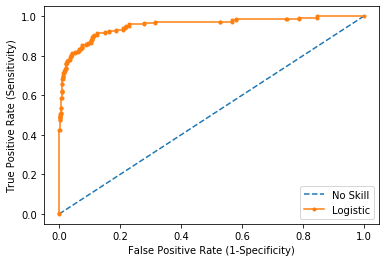

In [196]:
# Considering only the Non imputed Data Sets for the ROC curves
# Generating the ROC curve for Logistic Model
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_Imputed, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_Imputed, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate (1-Specificity)')
pyplot.ylabel('True Positive Rate (Sensitivity)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
KNN Clasifier: ROC AUC=0.911


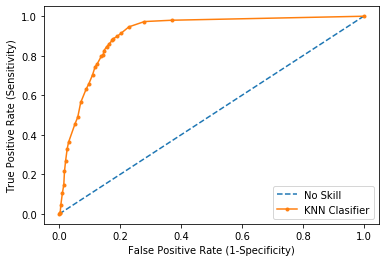

In [197]:
# Generating the ROC curve for KNN Model
# generate a no skill prediction (majority class)
ns_probs_knn = [0 for _ in range(len(y_test))]

# KNN predict probabilities
knn_probs = NNH.predict_proba(X_test)

# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# calculate scores
ns_auc_knn = roc_auc_score(y_test, ns_probs_knn)
knn_auc = roc_auc_score(y_test, knn_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc_knn))
print('KNN Clasifier: ROC AUC=%.3f' % (knn_auc))

# calculate roc curves
ns_fpr_knn, ns_tpr_knn, _ = roc_curve(y_test, ns_probs_knn)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr_knn, ns_tpr_knn, linestyle='--', label='No Skill')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN Clasifier')

# axis labels
pyplot.xlabel('False Positive Rate (1-Specificity)')
pyplot.ylabel('True Positive Rate (Sensitivity)')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Naive Bayes : ROC AUC=0.923


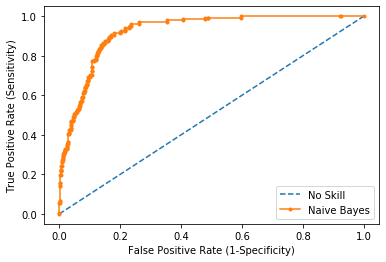

In [198]:
# Generating the ROC curve for Naive Bayes Model
# generate a no skill prediction (majority class)
ns_probs_nb = [0 for _ in range(len(y_test))]

# NB predict probabilities
nb_probs = nb_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]

# calculate scores
ns_auc_nb = roc_auc_score(y_test, ns_probs_nb)
nb_auc = roc_auc_score(y_test, nb_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc_nb))
print('Naive Bayes : ROC AUC=%.3f' % (nb_auc))

# calculate roc curves
ns_fpr_nb, ns_tpr_nb, _ = roc_curve(y_test, ns_probs_nb)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr_nb, ns_tpr_nb, linestyle='--', label='No Skill')
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')

# axis labels
pyplot.xlabel('False Positive Rate (1-Specificity)')
pyplot.ylabel('True Positive Rate (Sensitivity)')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()